# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [6]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [7]:
from utils import get_train_input

In [8]:
train_dataset = get_train_input("/app/project/training/reference/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/segment-10455472356147194054_1560_000_1580_000_with_camera_labels.tfrecord', './data/train/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord', './data/train/segment-1083056852838271990_4080_000_4100_000_with_camera_labels.tfrecord', './data/train/segment-10588771936253546636_2300_000_2320_000_with_camera_labels.tfrecord', './data/train/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord', './data/train/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord', './data/train/segment-10485926982439064520_4980_000_5000_000_with_camera_labels.tfrecord', './data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', './data/train/segment-10793018113277660068_2714_540_2734_540_with_camera_labels.tfrecord', './data/train/segment-11928449532664718059_1200_000_1220_000_with_camera_labels.tfrecord', './data/train/segment-11839652018869852123_25

INFO:tensorflow:Number of filenames to read: 58
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2021-11-06 17:24:16.214693: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
Instructions for updating:
Use `tf.cast` instead.


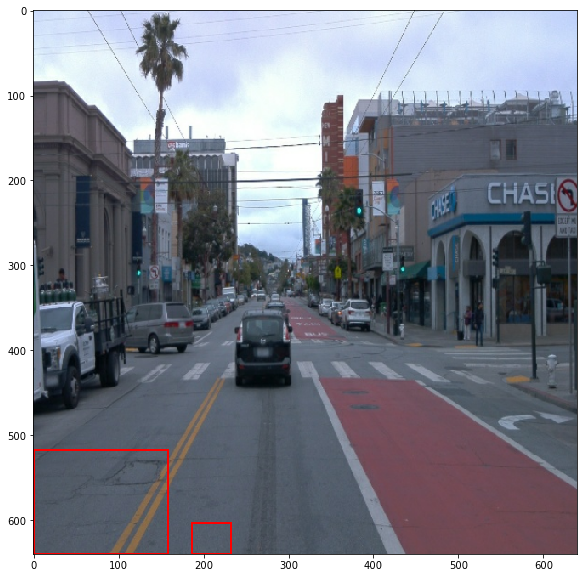

In [9]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)